# VGG Imagenet model

In [1]:
import keras
from keras.layers import Conv2D, Dropout, BatchNormalization, Activation
from keras.layers import Flatten, Dense, MaxPooling2D, ZeroPadding2D, Lambda
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [15]:
weight_decay = 0.0005
vgg_input_shape = [224, 224, 3]
vgg_imagenet_classes = 1000
def create_VGG16_model():
        model = Sequential()
        
        # Conv block 1
        model.add(Conv2D(64, input_shape=vgg_input_shape, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
                  
        # Conv block 2
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
                  
        #Conv block 3
        model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
                  
        #Conv block 4
        model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        #Conv block 5
        model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
        model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=l2(weight_decay)))
    
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
                  
        model.add(Flatten())                  
        
        # FC block 1
        model.add(Dense(4096, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # FC block 2
        model.add(Dense(4096, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
                  
        model.add(Dense(vgg_imagenet_classes, activation='softmax'))
        
        model.summary()
        
        return model

In [16]:
vgg16 = create_VGG16_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 56, 256)       295168    
__________

## Create a simple VGG style CNN for cifar10

The large number of parameters on the VGG_16 model make it difficult to train(computationally intensive, requires more memory and the model will eaily overfit on the small cifar10 dataset). So, creating a simple VGG styled CNN that can be trained and validated on cifar10.

The core design rules of VGG network construction are as follows:

> 1. For a given output feature map size (e.g. 32x32 or 16x16), you use the same number filters (channels) for each convolution layer.

> 2. Each time the feature map size is halved (e.g. by maxpooling with a stride of 2), you double the number of filters (channels) to maintain the same "time complexity per layer".
> 3. You end with a global average pooling layer followed by fully-connected (dense) layers and softmax.

In [2]:
num_classes = 10
x_shape = [32, 32, 3]

In [3]:
def simple_VGG():
    
    model = Sequential()
    
    # first conv block
    
    model.add(Conv2D(filters=64, activation='relu', padding='same', kernel_size=(3, 3), input_shape=x_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, activation='relu', padding='same', kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # second conv block
    
    model.add(Conv2D(filters=128, activation='relu', padding='same', kernel_size=(3, 3), input_shape=[32, 32, 3]))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, activation='relu', padding='same', kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, activation='relu', padding='same', kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # third conv block
    
    model.add(Conv2D(filters=256, activation='relu', padding='same', kernel_size=(3, 3), input_shape=[32, 32, 3]))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, activation='relu', padding='same', kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, activation='relu', padding='same', kernel_size=(3, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model


simple_VGG_model = simple_VGG()
simple_VGG_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 128)       512       
__________

In [4]:
def plot_histories(history_):
    
    # summarize history for accuracy
    plt.plot(history_.history['acc'])
    plt.plot(history_.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history_.history['loss'])
    plt.plot(history_.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

In [5]:
def get_onehot(y_data, num_classes=10):
    return to_categorical(y_data, num_classes)

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ensure desired data format
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')


# use final 5000 training samples (10%) as validation set
x_val = x_train[45000:].astype('float32')
y_val = y_train[45000:]
x_train = x_train[:45000].astype('float32')
y_train = y_train[:45000]

# print data shapes
print('\nx_train shape:', x_train.shape)
print('x_val shape:', x_val.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)


x_train shape: (45000, 32, 32, 3)
x_val shape: (5000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (45000, 1)
y_val shape: (5000, 1)
y_test shape: (10000, 1)


In [7]:
def compile_and_train(model, x_train_data, y_train_data, x_val_data, y_val_data, BATCH_SIZE, EPOCHS, optimizer):
    
    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # one-hot encode labels
    y_train_data_onehot = get_onehot(y_train_data)
    y_val_data_onehot = get_onehot(y_val_data)
    
    history = model.fit(x_train_data, y_train_data_onehot, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (x_val_data, y_val_data_onehot), shuffle = True)
    return history

In [8]:
def evaluate_performance(model_obj, x_train_data, y_train_data, x_test_data, y_test_data, model_hist=None):
    
    # plot accuracies versus epoch
    if model_hist is not None:
        print('\nPlotting Training History:')
        plot_histories(model_hist)
    
    # one-hot encoding
    y_train_data_onehot = get_onehot(y_train_data)
    y_test_data_onehot = get_onehot(y_test_data)
    
    train_score = model_obj.evaluate(x_train_data, y_train_data_onehot, verbose=0)
    print('\nTraining Accuracy:', train_score[1])
    
    test_score = model_obj.evaluate(x_test_data, y_test_data_onehot, verbose=0)
    print('Test Accuracy :', test_score[1])
    
    scores = (train_score[1], test_score[1])
    
    return scores

In [ ]:
optimizer = Adam(lr=0.001)
tr_hist = compile_and_train(model=simple_VGG_model, 
                            x_train_data=x_train, 
                            y_train_data=y_train, 
                            x_val_data=x_val, 
                            y_val_data=y_val, 
                            BATCH_SIZE=128, 
                            EPOCHS=100, 
                            optimizer=optimizer)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 85s 2ms/step - loss: 1.9063 - acc: 0.4466 - val_loss: 1.5419 - val_acc: 0.4974
Epoch 2/100
45000/45000 [==============================] - 78s 2ms/step - loss: 1.3155 - acc: 0.5954 - val_loss: 1.4212 - val_acc: 0.5180
Epoch 3/100
45000/45000 [==============================] - 79s 2ms/step - loss: 1.0802 - acc: 0.6676 - val_loss: 0.9795 - val_acc: 0.6800
Epoch 4/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.9561 - acc: 0.7047 - val_loss: 0.8714 - val_acc: 0.7098
Epoch 5/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.8055 - acc: 0.7536 - val_loss: 0.6857 - val_acc: 0.7742
Epoch 6/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.7407 - acc: 0.7752 - val_loss: 0.6841 - val_acc: 0.7752
Epoch 7/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.4126 - acc: 0.8822 - val_loss: 0.6329 - v

45000/45000 [==============================] - 79s 2ms/step - loss: 0.0374 - acc: 0.9887 - val_loss: 1.0559 - val_acc: 0.8442
Epoch 64/100
45000/45000 [==============================] - 80s 2ms/step - loss: 0.0367 - acc: 0.9888 - val_loss: 1.0027 - val_acc: 0.8422
Epoch 65/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.0329 - acc: 0.9892 - val_loss: 1.0924 - val_acc: 0.8386
Epoch 66/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.0378 - acc: 0.9881 - val_loss: 0.9574 - val_acc: 0.8506
Epoch 67/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.0362 - acc: 0.9888 - val_loss: 1.1001 - val_acc: 0.8340
Epoch 68/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.0411 - acc: 0.9875 - val_loss: 1.1196 - val_acc: 0.8424
Epoch 69/100
45000/45000 [==============================] - 79s 2ms/step - loss: 0.0366 - acc: 0.9889 - val_loss: 1.0525 - val_acc: 0.8448
Epoch 70/100
45000/45000 [==============


Plotting Training History:


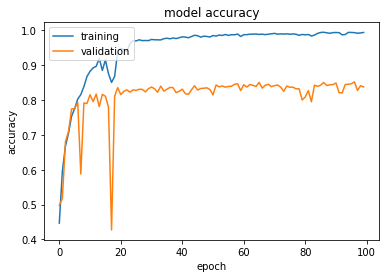

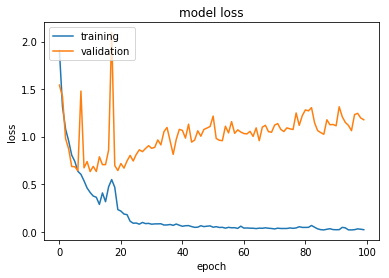


Training Accuracy: 0.9962888888888889
Test Accuracy : 0.8375


In [12]:
model_score = evaluate_performance(
    model_obj=simple_VGG_model,
    x_train_data=x_train,
    y_train_data=y_train,
    x_test_data=x_test,     
    y_test_data=y_test,
    model_hist=tr_hist)